In [2]:
###Próximas etapas para trabalhar - 30/7

##Interar mais rápido a parte de análise

##Selecionar os algoritmos em geral - 
  ##usar o excel(ideia pronta mas muito ruim)
  ##tentar copiar o algo do excel()
  ##pegar implement do python

#Método wrangling

  #Limpar a base geral

  #Selecionar as variáveis para serem utilizadas

  #Normalizar eles

  #Ter a base inteira certinha


#Utilizar os valores para os dois modelos de análise


  #Apenas algumas fazendas

  #Apenas clusters

  #Todas as linhas para entender o ecosistema




In [3]:
!pip install pandas==0.23.4
!pip install seaborn==0.9.0
!pip install tqdm

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("whitegrid")
from matplotlib import pyplot as plt
import gc
import tqdm as tqdm


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

sns.__version__,pd.__version__

('0.9.0', '0.23.4')

In [54]:
df=pd.read_csv("df_canastra.csv",sep=",",engine="python",encoding="utf-8")

# Data check

In [55]:
#Este arquivo originamente conta com 757 linhas e 200 colunas)
df.shape

(757, 200)

In [56]:
#Grande quantidade de NAs aparentes mas aparenta possuir processo de coleta robusto

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 200 columns):
QUEST                                                        int64
S_01_GPS_PONTO                                               int64
S_02_ESTE                                                    int64
S_03_NORTE                                                   int64
S_04_ALTITUDE                                                float64
S_05_FOTO                                                    int64
S_06_MUNICIPIO                                               object
S_07_DISTANCIA_AO_CENTRO                                     float64
S_08_DISTRITO                                                object
S_09_COMUNIDADE                                              object
S_10_NOME_ENTREVISTADO                                       object
S_11_SEXO                                                    object
S_12_FUNCAO_PROPRIEDADE                                      object
S_13_NOME_PRO

In [75]:
df["S_46_QUANTAS_ORDENHAS_DIÁRIAS"].value_counts(normalize=True)

UMA     0.630098
DUAS    0.369902
Name: S_46_QUANTAS_ORDENHAS_DIÁRIAS, dtype: float64

In [88]:
df["S_56_POSSUI_TREINAMENTO_EM_BPF"].value_counts(normalize=True)

NAO    0.791209
SIM    0.208791
Name: S_56_POSSUI_TREINAMENTO_EM_BPF, dtype: float64

In [97]:
pd.crosstab(df["S_27_E_COOPERADO_A_APROCAN"],df["S_131_APENAS_RENDA_QUEIJO_È_SUFICIENTE"],normalize=True)

#S_55_POSSUI_IMPLANTADA_AS_BPF

S_131_APENAS_RENDA_QUEIJO_È_SUFICIENTE,NAO,SIM
S_27_E_COOPERADO_A_APROCAN,,
NAO,0.338050,0.613208
SIM,0.017296,0.031447


In [58]:
df.head(1)

,QUEST,S_01_GPS_PONTO,S_02_ESTE,S_03_NORTE,S_04_ALTITUDE,S_05_FOTO,S_06_MUNICIPIO,S_07_DISTANCIA_AO_CENTRO,S_08_DISTRITO,S_09_COMUNIDADE,S_10_NOME_ENTREVISTADO,S_11_SEXO,S_12_FUNCAO_PROPRIEDADE,S_13_NOME_PROPRIETARIO,S_14_APELIDO,S_15_IDADE,S_16_SEXO,S_17_TELEFONE_CONTATO,S_18_RG,S_19_CPF,S_20_NOME_PROPRIEDADE,S_21_AREA_PROPRIEDADE,S_22_POSSUI_ENERGIA_ELETRICA,S_23_CASO_POSITIVO_QUANTOS_KVA,S_24_POSSUI_NUMERO_INSCRICAO_PRODUTOR,S_24_1_NUMERO_INSCRICAO,S_25_E_COOPERADO_SARONCRED,S_26_CASO_NAO_COOPERADO_MOTIVO,S_27_E_COOPERADO_A_APROCAN,S_28_CASO_NAO_ASSOCIADO_MOTIVO,S_29_SITUACAO_CADASTRAL_IMA,S_30_NUMERO_CADASTRO_IMA,S_31_CASO_CADASTRADO_IMA_VANTAGENS,S_32_SITUAÇÃO_CADASTRAL_JUNTO_A_SIF,S_33_NUMERO_SIF,S_34_SE_CADASTRADO_SIF_VANTAGENS,S_35_PRINCIPAIS_RACAS_UTILIZADAS,S_36_1_PASTAGEM_BRAQUIÁRIA_%,S_36_2_PASTAGEM_CAPIM_GORDURA_%,S_36_3_PASTAGEM_NATIVA_%,S_36_4_PASTAGEM_PROVISÓRIA_%,S_36_5_PASTAGEM_OUTROS_%,S_37_SISTEMA_DE_PRODUÇÃO,S_38_CASO_SEJA_A_PASTO,S_39_SUPLEMENTAÇÃO_ALIMENTAR,S_40_SUPLEMENTAÇÃO_MINEIRAL,S_41_POSSUI_TRONCO_E_BEZERRO,S_42_POSSUI_SALA_DE_ORDENHA,S_43_SALA_DE_ORDENHA_É_COBERTA,S_44_SALA_DE_ORDENHA_É_CIMENTADA,S_45_POSSUI_ORDENHA_MECÂNICA,S_46_QUANTAS_ORDENHAS_DIÁRIAS,S_47_ORDENHA,S_48_PRODUÇÃO_LEITE_MANHA_DIA,S_49_PRODUÇÃO_LEITE_A_TARDE_DIA,S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA,S_51_POSSUI_SALA_ÁREA_DE_ESPERA,S_52_CURRAL_É_CALÇADO,S_53_TEM_PONTO_DE_ÁGUA,S_54_SE_POSSUI_A_ÁGUA_É_CLORADA,S_55_POSSUI_IMPLANTADA_AS_BPF,S_56_POSSUI_TREINAMENTO_EM_BPF,S_57_FAZ_LIMPEZA_DOS_UTENSÍLIOS,S_58_FAZ_LIMPEZA_DOS_TETOS_ANTES_DA_ORDENHA,S_59_FAZ_SECAGEM_DO_ÚBERE,S_60_REALIZA_TESTE_MASTITE,S_61_CASO_REALIZE_TESTE_MASTITE_QUAL_FAZ,S_62_FAZ_TRATAMENTO_MASTITE,S_63_FAZ_TRATAMENTO_MASTITE_NAS_VACAS_MAGRAS,S_64_EM_CASO_USO_DE_ANTIBIÓTICOS_FICA_SEM_TIRAR_LEITE,S_65_INFRAESTRUTURA_E_BENFEITORIAS_EXISTENTES,S_66_NÚMERO_VACAS_EM_LACTAÇÃO,S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO,S_68_QUAIS_AS_VACINAS_APLICADAS_NO_REBANHO,S_69_QUAIS_EXAMES_REALIZADOS,S_70_DESTINO_ANIMAIS_SORO_POSITIVOS,S_71_FAZ_MARCAÇÃO_DOS_ANIMAIS,S_72_1_DESTINO_PRODUÇÃO_QUEIJO_LOCAL_%,S_72_2_DESTINO_PRODUÇÃO_QUEIJO_REGIONAL_%,S_72_3_DESTINO_PRODUÇÃO_QUEIJO_ENTREPOSTO_%,S_72_4_DESTINO_PRODUÇÃO_QUEIJO_BH_%,S_72_5_DESTINO_PRODUÇÃO_QUEIJO_SP_CAPITAL_%,S_72_6_DESTINO_PRODUÇÃO_QUEIJO_SP_INTERIOR%,S_72_7_DESTINO_PRODUÇÃO_QUEIJO_RJ%,S_72_6_DESTINO_PRODUÇÃO_QUEIJO_OUTROS%,S_73_FINALIDADE_DO_LEITE,S_74_1_PORCENTAGEM_DA_VENDA_DO_LEITE,S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO,S_75_NOME_DO_QUEIJO,S_76_1_TIPO_QUEIJO_CANASTRA_MERENDEIRO,S_77_1_QUANTIDADE_CANASTRA_MERENDEIRO,S_78_1_PESO_TOTAL_DIA_CANASTRA_MERENDEIRO,S_79_1_PREÇO_MÉDIO_RECEBIDO_CANASTRA_MERENDEIRO,S_76_2_TIPO_QUEIJO_CANASTRA,S_77_2_QUANTIDADE_QUEIJO_CANASTRA,S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA,S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA,S_76_3_TIPO_QUEIJO_CANASTRA_REAL,S_77_3_QUANTIDADE_QUEIJO_CANASTRA_REAL,S_78_3_PESO_TOTAL_DIA_QUEIJO_CANASTRA_REAL,S_79_3_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA_REAL,S_76_4_TIPO_QUEIJO_MEIA_CURA,S_77_4_QUANTIDADE_QUEIJO_MEIA_CURA,S_78_4_PESO_TOTAL_DIA_QUEIJO_MEIA_CURA,S_79_4_PREÇO_MÉDIO_RECEBIDO_QUEIJO_MEIA_CURA,S_76_5_TIPO_QUEIJO_CABACINHO,S_77_5_QUANTIDADE_QUEIJO_CABACINHO,S_78_5_PESO_TOTAL_DIA_QUEIJO_CABACINHO,S_79_5_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CABACINHO,S_76_6_REQUEIJAO,S_77_6_QUANTIDADE_REQUEIJAO,S_78_6_PESO_TOTAL_DIA_REQUEIJAO,S_79_6_PREÇO_MÉDIO_RECEBIDO_REQUEIJAO,S_80_QUANTO_PODERIA_AUMENTAR_SUA_PRODUÇÃO,S_81_QUAL_SERIA_GARGALO_HOJE,S_82_COALHO_UTILIZADO,S_83_MARCA_DO_COALHO,S_84_USA_PINGO,S_85_USA_RALA,S_86_COMO_UTILIZA_O_COALHO,S_87_SALGA,S_88_CASO_SALGUE_ONDE_COLOCA_O_SAL,S_89_1_TEMPO_DE_MATURAÇÃO_ATÉ_03_DIAS_%,S_89_2_TEMPO_DE_MATURAÇÃO_DE_04_A_10_DIAS_%,S_89_3_TEMPO_DE_MATURAÇÃO_DE_11_A_20_DIAS_%,S_89_4_TEMPO_DE_MATURAÇÃO_DE_ACIMA_21_DIAS_%,S_90_TEM_PONTO_DE_ÁGUA_NA_QUEIJARIA,S_91_A_ÁGUA_É_CLORADA,S_92_PRÁTICAS_SANITÁRIAS,S_93_POSSUI_IMPLANTADA_BPF,S_94_POSSUI_TREINAMENTO_EM_BPF,S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO,S_96_COM_QUEM_APRENDEU,S_97_VOCÊ_CONHECE_O_TERMO_INDICAÇÃO_GEOGRÁFICA,S_98

# General Variables Selection 

In [57]:
param=["S_06_MUNICIPIO",
        "S_10_NOME_ENTREVISTADO",
        "S_11_SEXO",
        "S_15_IDADE",
        "S_21_AREA_PROPRIEDADE",
        "S_23_CASO_POSITIVO_QUANTOS_KVA",
        "S_53_TEM_PONTO_DE_ÁGUA",
        "S_25_E_COOPERADO_SARONCRED",
        "S_26_CASO_NAO_COOPERADO_MOTIVO",
        "S_27_E_COOPERADO_A_APROCAN",
        "S_28_CASO_NAO_ASSOCIADO_MOTIVO",
        "S_29_SITUACAO_CADASTRAL_IMA",
        "S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA",
        "S_55_POSSUI_IMPLANTADA_AS_BPF",
        "S_56_POSSUI_TREINAMENTO_EM_BPF",
        "S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO",
        "S_77_2_QUANTIDADE_QUEIJO_CANASTRA",
        "S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA",
        "S_93_POSSUI_IMPLANTADA_BPF",
        "S_94_POSSUI_TREINAMENTO_EM_BPF",
        "S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO",
        "S_96_COM_QUEM_APRENDEU",
        "S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR",
        "S_130_QUAL_RENDA_MENSAL_PRODUÇAO",
        "S_132_1_PESSOAS_FAMILIA_ATÉ_12_ANOS",
        "S_132_2_PESSOAS_FAMILIA_ATÉ_18_ANOS",
        "S_132_3_PESSOAS_FAMILIA_ADULTOS_ATÉ_65_ANOS",
        "S_132_4_PESSOAS_FAMILIA_ACIMA_DE_65_ANOS",
        "S_134_FAZ_USO_CRÉDITO_RURAL",
        "S_135_PARA_QUE_FAZ_USO_CRÉDITO_RURAL",
        "S_136_FONTE_DE_RECURSO",
        "S_137_MOTIVO_PARA_NÃO_USAR_CRÉDITO_RURAL",
        "S_139_PROPRIEDADE_FAZ_CONTROLE_FINANCEIRO",
        "S_140_COMO_FAZ_CONTROLE_FINANCEIRO",
        "S_141_PROPRIEDADE_FAZ_ALGUM_TIPO_PREVISAO",
        "S_145_FAZ_USO_ASSISTENCIA_TECNICA",
        "S_146_PORQUE_NAO_FAZ_USO_DE_ASSISTENCIA_TECNICA",
        "S_147_TIPO_MAO_DE_OBRA_UTILIZADA",
        "S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE",
        "S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM"]

In [36]:
df_selected = df[param].copy(deep="True")

# Data wrangling of category division

In [37]:
#data shuffling

df_selected = df_selected.sample(frac=1,random_state = 1).reset_index(drop="index")

In [53]:
df_selected.isna().sum()

S_06_MUNICIPIO                                     0
S_10_NOME_ENTREVISTADO                             0
S_11_SEXO                                          0
S_15_IDADE                                         0
S_21_AREA_PROPRIEDADE                              0
S_23_CASO_POSITIVO_QUANTOS_KVA                     0
S_53_TEM_PONTO_DE_ÁGUA                             0
S_25_E_COOPERADO_SARONCRED                         0
S_26_CASO_NAO_COOPERADO_MOTIVO                     0
S_27_E_COOPERADO_A_APROCAN                         0
S_28_CASO_NAO_ASSOCIADO_MOTIVO                     0
S_29_SITUACAO_CADASTRAL_IMA                        0
S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA                   0
S_55_POSSUI_IMPLANTADA_AS_BPF                      0
S_56_POSSUI_TREINAMENTO_EM_BPF                     0
S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO                 0
S_77_2_QUANTIDADE_QUEIJO_CANASTRA                  0
S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA        0
S_93_POSSUI_IMPLANTADA_BPF                    

# Fill Na strategy for Zero Values

In [39]:
param_zero =["S_15_IDADE",
            "S_21_AREA_PROPRIEDADE",
            "S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA",
            "S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO",
            "S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO"]

In [40]:
for column in param_zero:
    df_selected.loc[df_selected[column]==0,column] = df_selected[column].median()

# Fill Na strategy for other variables according to proportion

In [41]:
for column in param:
    df_selected[column] = df_selected[column].fillna(method='ffill').fillna(method='bfill')

# Wrangling Strategy

In [42]:
param_wrangling = ["S_26_CASO_NAO_COOPERADO_MOTIVO",
                    "S_28_CASO_NAO_ASSOCIADO_MOTIVO",
                    "S_135_PARA_QUE_FAZ_USO_CRÉDITO_RURAL",
                    "S_136_FONTE_DE_RECURSO",
                    "S_137_MOTIVO_PARA_NÃO_USAR_CRÉDITO_RURAL",
                    "S_145_FAZ_USO_ASSISTENCIA_TECNICA",
                    "S_146_PORQUE_NAO_FAZ_USO_DE_ASSISTENCIA_TECNICA",
                    "S_147_TIPO_MAO_DE_OBRA_UTILIZADA"]

In [43]:
for i in param_wrangling:
    df_selected[i] = df_selected[i].apply(lambda x : str(x.replace(",","."))).str.split('.').str[0]

# Outlier Remotion

In [17]:
df_selected.shape

(757, 42)

In [18]:
param_outlier = ["S_15_IDADE",
                "S_21_AREA_PROPRIEDADE",
                "S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA",
                "S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO",
                "S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO",
                "S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR"]

In [19]:
#Até aqui

for i in param_outlier:
    df_selected = df_selected.loc[df_selected[i] < df_selected[i].quantile(0.99)]

In [51]:
#Data exportation

df_selected.to_csv("df_selected.csv",sep=',')

In [ ]:
#!Outlier Remotion!





In [ ]:
#K1 Env Donor  S_21_AREA_PROPRIEDADE/PASTAGEM  S_23_CASO_POSITIVO_QUANTOS_KVA S_53_TEM_PONTO_DE_ÁGUA

#K2 Env Receiver Soro de leite produzido Medido pela quantidade do Queijo / Solid Waste

#K3 Product Unit S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO S_77_2_QUANTIDADE_QUEIJO_CANASTRA S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA 

#K4 Society as Provider S_134_FAZ_USO_CRÉDITO_RURAL S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM

#K5 Society as Receiver Tax, Age,

In [44]:
df_selected.head(1)

,S_06_MUNICIPIO,S_10_NOME_ENTREVISTADO,S_11_SEXO,S_15_IDADE,S_21_AREA_PROPRIEDADE,S_23_CASO_POSITIVO_QUANTOS_KVA,S_53_TEM_PONTO_DE_ÁGUA,S_25_E_COOPERADO_SARONCRED,S_26_CASO_NAO_COOPERADO_MOTIVO,S_27_E_COOPERADO_A_APROCAN,S_28_CASO_NAO_ASSOCIADO_MOTIVO,S_29_SITUACAO_CADASTRAL_IMA,S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA,S_55_POSSUI_IMPLANTADA_AS_BPF,S_56_POSSUI_TREINAMENTO_EM_BPF,S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO,S_77_2_QUANTIDADE_QUEIJO_CANASTRA,S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA,S_93_POSSUI_IMPLANTADA_BPF,S_94_POSSUI_TREINAMENTO_EM_BPF,S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO,S_96_COM_QUEM_APRENDEU,S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR,S_130_QUAL_RENDA_MENSAL_PRODUÇAO,S_132_1_PESSOAS_FAMILIA_ATÉ_12_ANOS,S_132_2_PESSOAS_FAMILIA_ATÉ_18_ANOS,S_132_3_PESSOAS_FAMILIA_ADULTOS_ATÉ_65_ANOS,S_132_4_PESSOAS_FAMILIA_ACIMA_DE_65_ANOS,S_134_FAZ_USO_CRÉDITO_RURAL,S_135_PARA_QUE_FAZ_USO_CRÉDITO_RURAL,S_136_FONTE_DE_RECURSO,S_137_MOTIVO_PARA_NÃO_USAR_CRÉDITO_RURAL,S_139_PROPRIEDADE_FAZ_CONTROLE_FINANCEIRO,S_140_COMO_FAZ_CONTROLE_FINANCEIRO,S_141_PROPRIEDADE_FAZ_ALGUM_TIPO_PREVISAO,S_145_FAZ_USO_ASSISTENCIA_TECNICA,S_146_PORQUE_NAO_FAZ_USO_DE_ASSISTENCIA_TECNICA,S_147_TIPO_MAO_DE_OBRA_UTILIZADA,S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE,S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM
0,SÇO ROQUE DE MINAS,JOSE FLORENCIO DA SILVA,MASCULINO,77.0,1452.0,3,SIM,NAO,POUCO CONHECIMENTO,NAO,NAO PERCEBI VANTAGENS,RELACIONADO,330.0,NAO,NAO,50.0,42,9.0,NAO,NAO,28.0,FAMILIARES,10000.0,ACIMA DE 10 ATE 20 SALARIOS MINIMOS,2.0,1.0,3,2.0,NÇO,NAO SABE,OUTROS,OUTROS,NAO,ANOTA€OES EM BLOCOS E OU CADERNOS,NAO,FIRMA PARTICULAR,NUNCA PROCUREI,CONTRATADA,0,3.0


In [0]:
#variáveis com +1 resposta possível na mesma pergunta

def dummy_consol(data_origin):
    column_df=[

    "S_35_PRINCIPAIS_RACAS_UTILIZADAS",
    #"S_98_CASO_CONHEÇA_QUE_BENEFÍCIOS_ESPERA_DE_UMA_IG",

    "S_39_SUPLEMENTAÇÃO_ALIMENTAR",
    "S_40_SUPLEMENTAÇÃO_MINEIRAL",
    "S_68_QUAIS_AS_VACINAS_APLICADAS_NO_REBANHO",
    "S_71_FAZ_MARCAÇÃO_DOS_ANIMAIS",
    "S_81_QUAL_SERIA_GARGALO_HOJE",
    "S_92_PRÁTICAS_SANITÁRIAS",
    "S_114_TIPO_DE_RESÍDUO_GERADO_NA_PROPRIEDADE",
    "S_115_O_QUE_É_FEITO_COM_EMBALAGENS_DE_AGROTÓXICOS",
    "S_116_DESTINO_EMBALAGENS_DE_PRODUTOS_VETERINÁRIOS",
    "S_117_O_QUE_É_FEITO_COM_O_DEJETO_ANIMAL",
    "S_118_O_QUE_É_FEITO_COM_A_SOBRA_DE_CULTURAS",
    "S_119_O_QUE_É_FEITO_COM_O_SORO_DO_QUEIJO",

    "S_144_ACESSO_A_INFORMAÇAO", #sim ou não
    "S_145_FAZ_USO_ASSISTENCIA_TECNICA"
    ]


    df_dummy=pd.DataFrame()

    for name in column_df:

    dataframe = replace(column_name=name,data=data_origin)

    column,dataframe_recep = recep(dataframe=dataframe)

    df_clean=pd.DataFrame(clean(dataframe,dataframe_recep,column))

    df_dummy=pd.concat([df_dummy,df_clean],axis=1)


    return column_df,df_dummy.drop(columns=["cat_NAO","cat_NENHUMA","cat_OUTROS"],axis=1)

In [0]:
#consolidation

column_drop,df_dummy=dummy_consol(df_clean)

df_clean_full=pd.concat([df_clean.drop(column_drop,axis=1),df_dummy],axis=1)

### Data wrangling of category and numerical division

In [0]:
###Correto

param_cat = ["S_06_MUNICIPIO",
"S_16_SEXO",
"S_24_POSSUI_NUMERO_INSCRICAO_PRODUTOR",
"S_25_E_COOPERADO_SARONCRED",
"S_27_E_COOPERADO_A_APROCAN",
"S_29_SITUACAO_CADASTRAL_IMA",
"S_32_SITUAÇÃO_CADASTRAL_JUNTO_A_SIF",
"S_37_SISTEMA_DE_PRODUÇÃO",
"S_42_POSSUI_SALA_DE_ORDENHA",
"S_45_POSSUI_ORDENHA_MECÂNICA",
"S_46_QUANTAS_ORDENHAS_DIÁRIAS",
"S_53_TEM_PONTO_DE_ÁGUA",
"S_54_SE_POSSUI_A_ÁGUA_É_CLORADA",
"S_55_POSSUI_IMPLANTADA_AS_BPF",
"S_56_POSSUI_TREINAMENTO_EM_BPF",
"S_57_FAZ_LIMPEZA_DOS_UTENSÍLIOS",
"S_58_FAZ_LIMPEZA_DOS_TETOS_ANTES_DA_ORDENHA",
"S_59_FAZ_SECAGEM_DO_ÚBERE",
"S_60_REALIZA_TESTE_MASTITE",
"S_62_FAZ_TRATAMENTO_MASTITE",
"S_82_COALHO_UTILIZADO",
"S_84_USA_PINGO",
"S_85_USA_RALA",
"S_87_SALGA",
"S_90_TEM_PONTO_DE_ÁGUA_NA_QUEIJARIA",
"S_91_A_ÁGUA_É_CLORADA",
"S_93_POSSUI_IMPLANTADA_BPF",
"S_94_POSSUI_TREINAMENTO_EM_BPF",
"S_96_COM_QUEM_APRENDEU",
"S_97_VOCÊ_CONHECE_O_TERMO_INDICAÇÃO_GEOGRÁFICA",
"S_99_SABE_QUE_A_REGIÃO_CANASTRA_RECEBEU_REGISTRO_IG",
"S_100_HA_AGUA_CORRENTE_NA_PROPRIEDADE",
"S_101_ESTA_AGUA_ESTÁ_POLUIDA",
"S_103_POSSUI_NASCENTE_PROPRIEDADE",
"S_105_NASCENTES_ESTAO_CONSERVADAS",
"S_107_FONTE_DE_CAPTAÇÃO_DE_AGUA",
"S_108_ÁGUA_UTILIZADA_POSSUI_REGISTRO",
"S_109_POSSUI_VEGETAÇÃO_NA_PROPRIEDADE",
"S_111_POSSUI_RESERVA_LEGAL_REGISTRADA",
"S_120_POSSUI_REGULARIZAÇÃO_AMBIENTAL_PRODUÇÃO",
"S_121_TRABALHA_COM_AGROTURISMO_NA_PROPRIEDADE",
"S_122_CASO_NAO_TRABALHE_AGROTURISMO_TEM_INTERESSE",
"S_127_PODE_AFIRMAR_COM_CERTEZA_LUCRO_POR_UNIDADE_QUEIJO",
"S_128_PROPRIEDADE_TEM_BUSCADO_REDUZIR_CUSTOS",
"S_130_QUAL_RENDA_MENSAL_PRODUÇAO",
"S_131_APENAS_RENDA_QUEIJO_È_SUFICIENTE",
"S_133_QUANTAS_PESSOAS_FAMILIA_DEPENDEM_DA_RENDA_DO_QUEIJO",
"S_134_FAZ_USO_CRÉDITO_RURAL",
"S_138_QUEM_GERENCIA_PROPRIEDADE",
"S_139_PROPRIEDADE_FAZ_CONTROLE_FINANCEIRO",
"S_140_COMO_FAZ_CONTROLE_FINANCEIRO",
"S_141_PROPRIEDADE_FAZ_ALGUM_TIPO_PREVISAO",
"S_142_PROPRIEDADE_POSSUI_COMPUTADOR",
"S_143_A_PROPRIEDADE_POSSUI_INTERNET",
"S_150_POSSUI_ABASTECIMENTO_ÁGUA_RESIDÊNCIA",
"S_151_CONDIÇÕES_DAS_ESTRADAS",
"S_152_POSSUI_NÚMERO_INSCRIÇÃO_SOCIAL",
"S_154_TEM_DOCUMENTAÇÃO_LEGALIZADA_DA_PROPRIEDADE",
"S_156_PRODUÇÃO_SOFRE_INTERFERÊNCIA_POR_PARTE_ICMBIO_IBAMA",
             
             
'cat_GIROLANDO', 'cat_CRUZADO', 'cat_HOLANDES', 'cat_GIR',
'cat_JERSEY', 'cat_CARACU', 'cat_NELORE', 'cat_GUZERA',
'cat_BUFALO', 'cat_ZEBU', 'cat_RA€AO COMERCIAL',
'cat_RA€AO PREPARADA NA FAZENDA', 'cat_SILAGEM', 'cat_CANA',
'cat_CAPINEIRA', 'cat_SAL COMUM', 'cat_PREPARADO NA FAZENDA',
'cat_PROTEINADO', 'cat_MISTURA PRONTA', 'cat_AFTOSA', 'cat_RAIVA',
'cat_LEPTOSPIROSE', 'cat_TETANO', 'cat_CARBUNCULO',
'cat_BRUCELOSE', 'cat_CRUZADO', 'cat_IBR BVD', 'cat_BRINCO',
'cat_A FOGO', 'cat_ELETRONICO', 'cat_TATUAGEM', 'cat_CAPACITA€ÇO',
'cat_MAT\x90RIA PRIMA LEITE', 'cat_MERCADO',
'cat_MÇO DE OBRA ESPECIALIZADA', 'cat_EQUIPAMENTOS',
'cat_FINANCIAMENTO', 'cat_HIEGENIZA€AO DIARIA DAS INSTAL€OES',
'cat_HIEGENIZA€AO DOS EQUIPAMENTOS IMEDIATAMENTE APOS O USO',
'cat_HIGIENE PESSOAL',
'cat_HIEGENIZA€AO ESPORADICA DAS INSTAL€OES',
'cat_CONTROLE DE PRAGAS', 'cat_USO DE UNIFORMES',
'cat_HIEGENIZA€AO ESPORADICA DOS EQUIPAMENTOS ',
'cat_BARREIRA SANITARIA', 'cat_EMBALAGENS DE AGROTOXICOS',
'cat_PRODUTOS VETERINARIOS', 'cat_SOBRAS DE CULTURAS',
'cat_DEJETOS DE ANIMAIS', 'cat_SORO DE QUEIJO',
'cat_DEVOLVE AO FORNECEDOR', 'cat_ENTERRA', 'cat_QUEIMA',
'cat_QUEIMA', 'cat_CRUZADO', 'cat_DEVOLVE AO FORNECEDOR',
'cat_ENTERRA', 'cat_REUTILIZA',
'cat_JOGA DIRETO EM CULTURAS PARA ADUBA€AO', 'cat_COMPOSTAGEM',
'cat_DEIXA NO LOCAL DE ORIGEM', 'cat_DEIXA NO SOLO PARA ADUBA€AO',
'cat_COMPOSTAGEM', 'cat_UTILIZA EM ARTESANATO',
'cat_NUTRI€AO DE SUINOS', 'cat_TRATAMENTO EFLUENTES',
'cat_NUTRI€AO DE SUINOSNUTRI€AO DE SUINOS', 'cat_RADIO', 'cat_TV',
'cat_JORNAL', 'cat_INTERNET', 'cat_REVISTAS', 'cat_LIVROS',
'cat_FIRMA PARTICULAR', 'cat_EMATER', 'cat_NAO USA',
'cat_COOPERATIVAS', 'cat_PROFISSIONAL LIBERAL', 'cat_SINDICATO',
'cat_SEBRAE', 'cat_PREFEITURAS', 'cat_APROCAN', 'cat_ONGS',
'cat_EMBRAPA']

In [0]:
##Correto

param_num=["S_07_DISTANCIA_AO_CENTRO",
"S_15_IDADE",
"S_21_AREA_PROPRIEDADE",
"S_23_CASO_POSITIVO_QUANTOS_KVA",
"S_36_1_PASTAGEM_BRAQUIÁRIA_%",
"S_36_2_PASTAGEM_CAPIM_GORDURA_%",
"S_36_3_PASTAGEM_NATIVA_%",
"S_36_4_PASTAGEM_PROVISÓRIA_%",
"S_36_5_PASTAGEM_OUTROS_%",
"S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA",
"S_65_INFRAESTRUTURA_E_BENFEITORIAS_EXISTENTES",
"S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO",
"S_72_1_DESTINO_PRODUÇÃO_QUEIJO_LOCAL_%",
"S_72_2_DESTINO_PRODUÇÃO_QUEIJO_REGIONAL_%",
"S_72_3_DESTINO_PRODUÇÃO_QUEIJO_ENTREPOSTO_%",
"S_72_4_DESTINO_PRODUÇÃO_QUEIJO_BH_%",
"S_72_5_DESTINO_PRODUÇÃO_QUEIJO_SP_CAPITAL_%",
"S_72_6_DESTINO_PRODUÇÃO_QUEIJO_SP_INTERIOR%",
"S_72_7_DESTINO_PRODUÇÃO_QUEIJO_RJ%",
"S_72_6_DESTINO_PRODUÇÃO_QUEIJO_OUTROS%",
"S_74_1_PORCENTAGEM_DA_VENDA_DO_LEITE",
"S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO",
"S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA",
"S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA",
"S_80_QUANTO_PODERIA_AUMENTAR_SUA_PRODUÇÃO",
"S_89_1_TEMPO_DE_MATURAÇÃO_ATÉ_03_DIAS_%",
"S_89_2_TEMPO_DE_MATURAÇÃO_DE_04_A_10_DIAS_%",
"S_89_3_TEMPO_DE_MATURAÇÃO_DE_11_A_20_DIAS_%",
"S_89_4_TEMPO_DE_MATURAÇÃO_DE_ACIMA_21_DIAS_%",
"S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO",
"S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR",
"S_132_1_PESSOAS_FAMILIA_ATÉ_12_ANOS",
"S_132_2_PESSOAS_FAMILIA_ATÉ_18_ANOS",
"S_132_3_PESSOAS_FAMILIA_ADULTOS_ATÉ_65_ANOS",
"S_132_4_PESSOAS_FAMILIA_ACIMA_DE_65_ANOS",
"S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE",
"S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM"
          ]

In [0]:
#convert numerical values accordingly

df_clean_full[param_num] = df_clean_full[param_num].apply(lambda x : x.replace(r"\D+","",regex=True),axis=0).fillna(0).astype("Int64")

#convert category and numerical values accordingly - already fixed - no need for wrangling
                                                                   
df_clean_full[param_cat].astype("str").head(2)                                                               
                                                                   

,S_06_MUNICIPIO,S_16_SEXO,S_24_POSSUI_NUMERO_INSCRICAO_PRODUTOR,S_25_E_COOPERADO_SARONCRED,S_27_E_COOPERADO_A_APROCAN,S_29_SITUACAO_CADASTRAL_IMA,S_32_SITUAÇÃO_CADASTRAL_JUNTO_A_SIF,S_37_SISTEMA_DE_PRODUÇÃO,S_42_POSSUI_SALA_DE_ORDENHA,S_45_POSSUI_ORDENHA_MECÂNICA,S_46_QUANTAS_ORDENHAS_DIÁRIAS,S_53_TEM_PONTO_DE_ÁGUA,S_54_SE_POSSUI_A_ÁGUA_É_CLORADA,S_55_POSSUI_IMPLANTADA_AS_BPF,S_56_POSSUI_TREINAMENTO_EM_BPF,S_57_FAZ_LIMPEZA_DOS_UTENSÍLIOS,S_58_FAZ_LIMPEZA_DOS_TETOS_ANTES_DA_ORDENHA,S_59_FAZ_SECAGEM_DO_ÚBERE,S_60_REALIZA_TESTE_MASTITE,S_62_FAZ_TRATAMENTO_MASTITE,S_82_COALHO_UTILIZADO,S_84_USA_PINGO,S_85_USA_RALA,S_87_SALGA,S_90_TEM_PONTO_DE_ÁGUA_NA_QUEIJARIA,S_91_A_ÁGUA_É_CLORADA,S_93_POSSUI_IMPLANTADA_BPF,S_94_POSSUI_TREINAMENTO_EM_BPF,S_96_COM_QUEM_APRENDEU,S_97_VOCÊ_CONHECE_O_TERMO_INDICAÇÃO_GEOGRÁFICA,S_99_SABE_QUE_A_REGIÃO_CANASTRA_RECEBEU_REGISTRO_IG,S_100_HA_AGUA_CORRENTE_NA_PROPRIEDADE,S_101_ESTA_AGUA_ESTÁ_POLUIDA,S_103_POSSUI_NASCENTE_PROPRIEDADE,S_105_NASCENTES_ESTAO_CONSERVADAS,S_107_FONTE_DE_CAPTAÇÃO_DE_AGUA,S_108_ÁGUA_UTILIZADA_POSSUI_REGISTRO,S_109_POSSUI_VEGETAÇÃO_NA_PROPRIEDADE,S_111_POSSUI_RESERVA_LEGAL_REGISTRADA,S_120_POSSUI_REGULARIZAÇÃO_AMBIENTAL_PRODUÇÃO,S_121_TRABALHA_COM_AGROTURISMO_NA_PROPRIEDADE,S_122_CASO_NAO_TRABALHE_AGROTURISMO_TEM_INTERESSE,S_127_PODE_AFIRMAR_COM_CERTEZA_LUCRO_POR_UNIDADE_QUEIJO,S_128_PROPRIEDADE_TEM_BUSCADO_REDUZIR_CUSTOS,S_130_QUAL_RENDA_MENSAL_PRODUÇAO,S_131_APENAS_RENDA_QUEIJO_È_SUFICIENTE,S_133_QUANTAS_PESSOAS_FAMILIA_DEPENDEM_DA_RENDA_DO_QUEIJO,S_134_FAZ_USO_CRÉDITO_RURAL,S_138_QUEM_GERENCIA_PROPRIEDADE,S_139_PROPRIEDADE_FAZ_CONTROLE_FINANCEIRO,S_140_COMO_FAZ_CONTROLE_FINANCEIRO,S_141_PROPRIEDADE_FAZ_ALGUM_TIPO_PREVISAO,S_142_PROPRIEDADE_POSSUI_COMPUTADOR,S_143_A_PROPRIEDADE_POSSUI_INTERNET,S_150_POSSUI_ABASTECIMENTO_ÁGUA_RESIDÊNCIA,S_151_CONDIÇÕES_DAS_ESTRADAS,S_152_POSSUI_NÚMERO_INSCRIÇÃO_SOCIAL,S_154_TEM_DOCUMENTAÇÃO_LEGALIZADA_DA_PROPRIEDADE,S_156_PRODUÇÃO_SOFRE_INTERFERÊNCIA_POR_PARTE_ICMBIO_IBAMA,cat_GIROLANDO,cat_CRUZADO,cat_CRUZADO,cat_CRUZADO,cat_HOLANDES,cat_GIR,cat_JERSEY,cat_CARACU,cat_NELORE,cat_GUZERA,cat_BUFALO,cat_ZEBU,cat_RA€AO COMERCIAL,cat_RA€AO PREPARADA NA FAZENDA,cat_SILAGEM,cat_CANA,cat_CAPINEIRA,cat_SAL COMUM,cat_PREPARADO NA FAZENDA,cat_PROTEINADO,cat_MISTURA PRONTA,cat_AFTOSA,cat_RAIVA,cat_LEPTOSPIROSE,cat_TETANO,cat_CARBUNCULO,cat_BRUCELOSE,cat_CRUZADO,cat_CRUZADO,cat_CRUZADO,cat_IBR BVD,cat_BRINCO,cat_A FOGO,cat_ELETRONICO,cat_TATUAGEM,cat_CAPACITA€ÇO,cat_MATRIA PRIMA LEITE,cat_MERCADO,cat_MÇO DE OBRA ESPECIALIZADA,cat_EQUIPAMENTOS,cat_FINANCIAMENTO,cat_HIEGENIZA€AO DIARIA DAS INSTAL€OES,cat_HIEGENIZA€AO DOS EQUIPAMENTOS IMEDIATAMENTE APOS O USO,cat_HIGIENE PESSOAL,cat_HIEGENIZA€AO ESPORADICA DAS INSTAL€OES,cat_CONTROLE DE PRAGAS,cat_USO DE UNIFORMES,cat_HIEGENIZA€AO ESPORADICA DOS EQUIPAMENTOS,cat_BARREIRA SANITARIA,cat_EMBALAGENS DE AGROTOXICOS,cat_PRODUTOS VETERINARIOS,cat_SOBRAS DE CULTURAS,cat_DEJETOS DE ANIMAIS,cat_SORO DE QUEIJO,cat_DEVOLVE AO FORNECEDOR,cat_DEVOLVE AO FORNECEDOR,cat_ENTERRA,cat_ENTERRA,cat_QUEIMA,cat_QUEIMA,cat_QUEIMA,cat_QUEIMA,cat_CRUZADO,cat_CRUZADO,cat_CRUZADO,cat_DEVOLVE AO FORNECEDOR,cat_DEVOLVE AO FORNECEDOR,cat_ENTERRA,cat_ENTERRA,cat_REUTILIZA,cat_JOGA DIRETO EM CULTURAS PARA ADUBA€AO,cat_COMPOSTAGEM,cat_COMPOSTAGEM,cat_DEIXA NO LOCAL DE ORIGEM,cat_DEIXA NO SOLO PARA ADUBA€AO,cat_COMPOSTAGEM,cat_COMPOSTAGEM,cat_UTILIZA EM ARTESANATO,cat_NUTRI€AO DE SUINOS,cat_TRATAMENTO EFLUENTES,cat_NUTRI€AO DE SUINOSNUTRI€AO DE SUINOS,cat_RADIO,cat_TV,cat_JORNAL,cat_INTERNET,cat_REVISTAS,cat_LIVROS,cat_FIRMA PARTICULAR,cat_EMATER,cat_NAO USA,cat_COOPERATIVAS,cat_PROFISSIONAL LIBERAL,cat_SINDICATO,cat_SEBRAE,cat_PREFEITURAS,cat_APROCAN,cat_ONGS,cat_EMBRAPA
0,SÇO ROQUE DE MINAS,MASCULINO,SIM,NAO,NAO,RELACIONADO,RELACIONADO,A PASTO,SIM,SIM,DUAS,SIM,NAO,NAO,NAO,AGUA MAIS DESINFETANTE,OUTROS,SECA COM PAPEL TOALHA,SIM,SIM,LIQUIDO,SIM,NAO,SAL GROSSO,SIM,NAO,NAO,NAO,FAMILIARES,NAO,NAO,SIM,NAO,SIM,SIM,NASCENTE,NAO,SIM,SIM,NAO,NÇO,SIM,NAO,

### New variables creation

In [0]:
#leite para o queijo 

#leite para o queijo 

df_clean_full = df_clean_full.loc[df_clean_full["S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR"]!=300000]

In [0]:
df_clean_full.head(1)

,S_06_MUNICIPIO,S_07_DISTANCIA_AO_CENTRO,S_15_IDADE,S_16_SEXO,S_21_AREA_PROPRIEDADE,S_23_CASO_POSITIVO_QUANTOS_KVA,S_24_POSSUI_NUMERO_INSCRICAO_PRODUTOR,S_25_E_COOPERADO_SARONCRED,S_27_E_COOPERADO_A_APROCAN,S_29_SITUACAO_CADASTRAL_IMA,S_32_SITUAÇÃO_CADASTRAL_JUNTO_A_SIF,S_36_1_PASTAGEM_BRAQUIÁRIA_%,S_36_2_PASTAGEM_CAPIM_GORDURA_%,S_36_3_PASTAGEM_NATIVA_%,S_36_4_PASTAGEM_PROVISÓRIA_%,S_36_5_PASTAGEM_OUTROS_%,S_37_SISTEMA_DE_PRODUÇÃO,S_42_POSSUI_SALA_DE_ORDENHA,S_45_POSSUI_ORDENHA_MECÂNICA,S_46_QUANTAS_ORDENHAS_DIÁRIAS,S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA,S_53_TEM_PONTO_DE_ÁGUA,S_54_SE_POSSUI_A_ÁGUA_É_CLORADA,S_55_POSSUI_IMPLANTADA_AS_BPF,S_56_POSSUI_TREINAMENTO_EM_BPF,S_57_FAZ_LIMPEZA_DOS_UTENSÍLIOS,S_58_FAZ_LIMPEZA_DOS_TETOS_ANTES_DA_ORDENHA,S_59_FAZ_SECAGEM_DO_ÚBERE,S_60_REALIZA_TESTE_MASTITE,S_62_FAZ_TRATAMENTO_MASTITE,S_65_INFRAESTRUTURA_E_BENFEITORIAS_EXISTENTES,S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO,S_72_1_DESTINO_PRODUÇÃO_QUEIJO_LOCAL_%,S_72_2_DESTINO_PRODUÇÃO_QUEIJO_REGIONAL_%,S_72_3_DESTINO_PRODUÇÃO_QUEIJO_ENTREPOSTO_%,S_72_4_DESTINO_PRODUÇÃO_QUEIJO_BH_%,S_72_5_DESTINO_PRODUÇÃO_QUEIJO_SP_CAPITAL_%,S_72_6_DESTINO_PRODUÇÃO_QUEIJO_SP_INTERIOR%,S_72_7_DESTINO_PRODUÇÃO_QUEIJO_RJ%,S_72_6_DESTINO_PRODUÇÃO_QUEIJO_OUTROS%,S_74_1_PORCENTAGEM_DA_VENDA_DO_LEITE,S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO,S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA,S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA,S_80_QUANTO_PODERIA_AUMENTAR_SUA_PRODUÇÃO,S_82_COALHO_UTILIZADO,S_84_USA_PINGO,S_85_USA_RALA,S_87_SALGA,S_89_1_TEMPO_DE_MATURAÇÃO_ATÉ_03_DIAS_%,S_89_2_TEMPO_DE_MATURAÇÃO_DE_04_A_10_DIAS_%,S_89_3_TEMPO_DE_MATURAÇÃO_DE_11_A_20_DIAS_%,S_89_4_TEMPO_DE_MATURAÇÃO_DE_ACIMA_21_DIAS_%,S_90_TEM_PONTO_DE_ÁGUA_NA_QUEIJARIA,S_91_A_ÁGUA_É_CLORADA,S_93_POSSUI_IMPLANTADA_BPF,S_94_POSSUI_TREINAMENTO_EM_BPF,S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO,S_96_COM_QUEM_APRENDEU,S_97_VOCÊ_CONHECE_O_TERMO_INDICAÇÃO_GEOGRÁFICA,S_99_SABE_QUE_A_REGIÃO_CANASTRA_RECEBEU_REGISTRO_IG,S_100_HA_AGUA_CORRENTE_NA_PROPRIEDADE,S_101_ESTA_AGUA_ESTÁ_POLUIDA,S_103_POSSUI_NASCENTE_PROPRIEDADE,S_105_NASCENTES_ESTAO_CONSERVADAS,S_107_FONTE_DE_CAPTAÇÃO_DE_AGUA,S_108_ÁGUA_UTILIZADA_POSSUI_REGISTRO,S_109_POSSUI_VEGETAÇÃO_NA_PROPRIEDADE,S_111_POSSUI_RESERVA_LEGAL_REGISTRADA,S_120_POSSUI_REGULARIZAÇÃO_AMBIENTAL_PRODUÇÃO,S_121_TRABALHA_COM_AGROTURISMO_NA_PROPRIEDADE,S_122_CASO_NAO_TRABALHE_AGROTURISMO_TEM_INTERESSE,S_127_PODE_AFIRMAR_COM_CERTEZA_LUCRO_POR_UNIDADE_QUEIJO,S_128_PROPRIEDADE_TEM_BUSCADO_REDUZIR_CUSTOS,S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR,S_130_QUAL_RENDA_MENSAL_PRODUÇAO,S_131_APENAS_RENDA_QUEIJO_È_SUFICIENTE,S_132_1_PESSOAS_FAMILIA_ATÉ_12_ANOS,S_132_2_PESSOAS_FAMILIA_ATÉ_18_ANOS,S_132_3_PESSOAS_FAMILIA_ADULTOS_ATÉ_65_ANOS,S_132_4_PESSOAS_FAMILIA_ACIMA_DE_65_ANOS,S_133_QUANTAS_PESSOAS_FAMILIA_DEPENDEM_DA_RENDA_DO_QUEIJO,S_134_FAZ_USO_CRÉDITO_RURAL,S_138_QUEM_GERENCIA_PROPRIEDADE,S_139_PROPRIEDADE_FAZ_CONTROLE_FINANCEIRO,S_140_COMO_FAZ_CONTROLE_FINANCEIRO,S_141_PROPRIEDADE_FAZ_ALGUM_TIPO_PREVISAO,S_142_PROPRIEDADE_POSSUI_COMPUTADOR,S_143_A_PROPRIEDADE_POSSUI_INTERNET,S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE,S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM,S_150_POSSUI_ABASTECIMENTO_ÁGUA_RESIDÊNCIA,S_151_CONDIÇÕES_DAS_ESTRADAS,S_152_POSSUI_NÚMERO_INSCRIÇÃO_SOCIAL,S_154_TEM_DOCUMENTAÇÃO_LEGALIZADA_DA_PROPRIEDADE,S_156_PRODUÇÃO_SOFRE_INTERFERÊNCIA_POR_PARTE_ICMBIO_IBAMA,cat_GIROLANDO,cat_CRUZADO,cat_HOLANDES,cat_GIR,cat_JERSEY,cat_CARACU,cat_NELORE,cat_GUZERA,cat_BUFALO,cat_ZEBU,cat_RA€AO COMERCIAL,cat_RA€AO PREPARADA NA FAZENDA,cat_SILAGEM,cat_CANA,cat_CAPINEIRA,cat_SAL COMUM,cat_PREPARADO NA FAZENDA,cat_PROTEINADO,cat_MISTURA PRONTA,cat_AFTOSA,cat_RAIVA,cat_LEPTOSPIROSE,cat_TETANO,cat_CARBUNCULO,cat_BRUCELOSE,cat_CRUZADO,cat_IBR BVD,cat_BRINCO,cat_A FOGO,cat_ELETRONICO,cat_TATUAGEM,cat_CAPACITA€ÇO,cat_MATRIA PRIMA LEITE,cat_MERCADO,cat_MÇO DE OBRA ESPECIALIZADA,cat_EQUIPAMENTOS,cat_FINANCIAMENTO,cat_HIEGENIZA€AO DIARIA DAS INSTAL€OES,cat_HIEGENIZA€AO DOS EQUIPAMENTOS IMEDIATAMENTE APOS O USO,cat_HIGIENE 

### Data visualization - no outlier treatment

[]

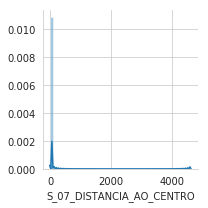

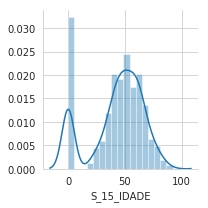

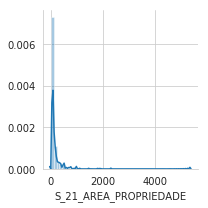

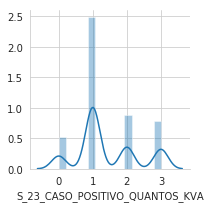

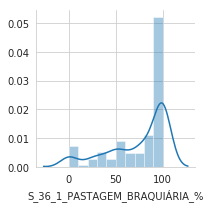

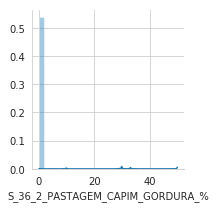

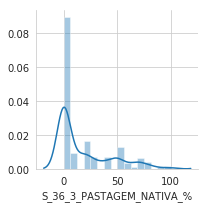

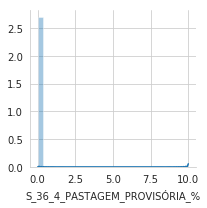

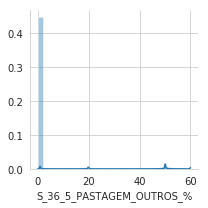

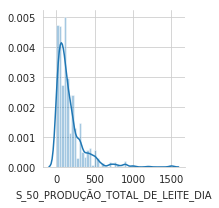

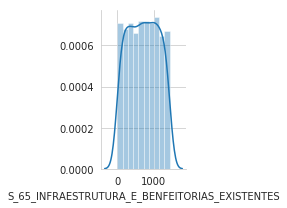

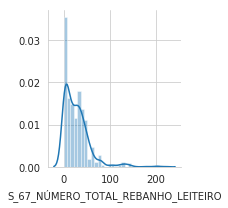

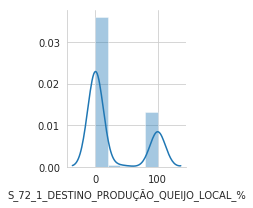

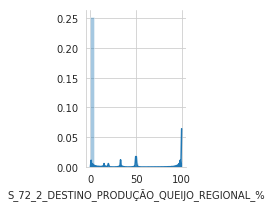

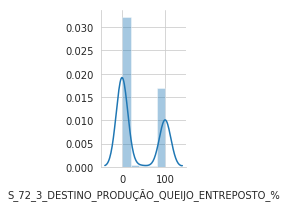

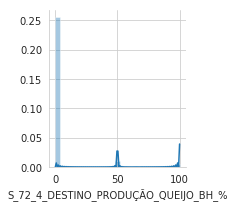

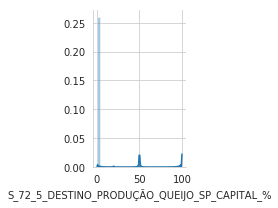

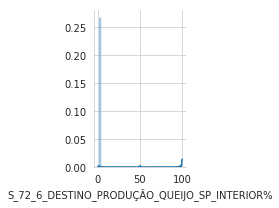

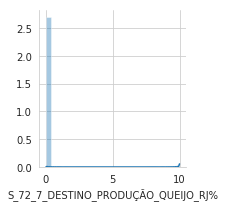

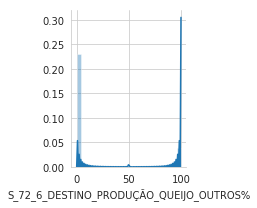

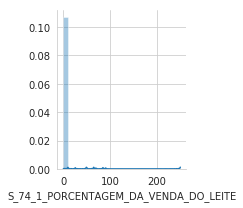

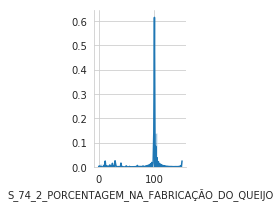

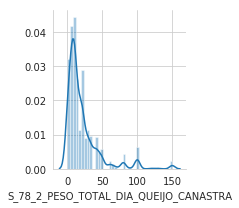

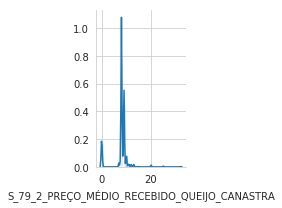

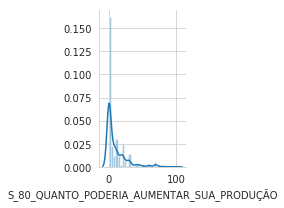

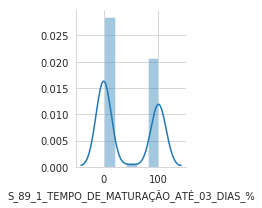

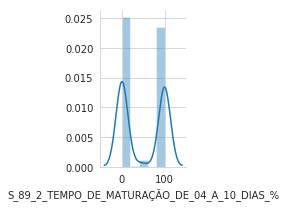

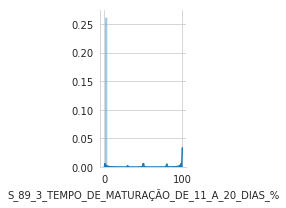

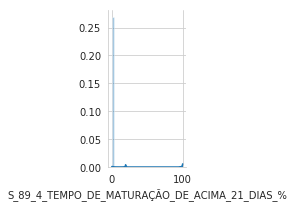

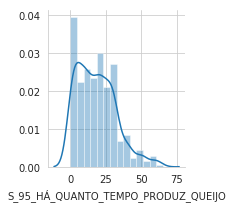

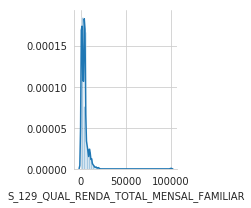

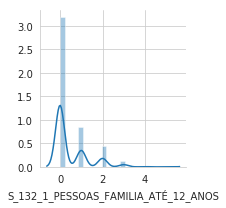

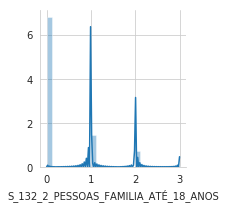

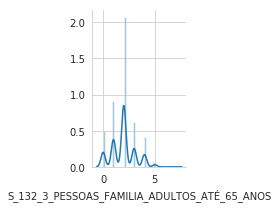

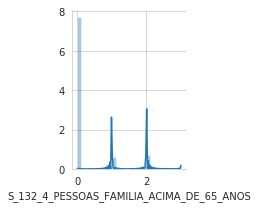

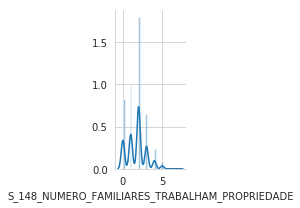

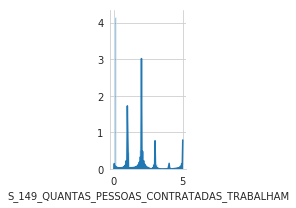

In [0]:
#Distribuição geral dos dados

#Numerical variables

#Pode-se notar diversas distribuições (bi,normal,exponencial e triangular)

#Outliers candidato - Distancia Centro, idade cheia de zero,S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO,
#S_74_1_PORCENTAGEM_DA_VENDA_DO_LEITE,S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO

for feature in param_num:  
  
  g = sns.FacetGrid(df_clean_full[param_num]) 
  g.map(sns.distplot, feature) 
  
plt.plot()

In [0]:
#Checar esse caso melhor 

df_clean_full.loc[df_clean_full["S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR"]==300000]

#S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE=1	S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM	=1

 # 250 -> 1500 (leite) ->  150 (queijo canastra)

,S_06_MUNICIPIO,S_07_DISTANCIA_AO_CENTRO,S_15_IDADE,S_16_SEXO,S_21_AREA_PROPRIEDADE,S_23_CASO_POSITIVO_QUANTOS_KVA,S_24_POSSUI_NUMERO_INSCRICAO_PRODUTOR,S_25_E_COOPERADO_SARONCRED,S_27_E_COOPERADO_A_APROCAN,S_29_SITUACAO_CADASTRAL_IMA,S_32_SITUAÇÃO_CADASTRAL_JUNTO_A_SIF,S_36_1_PASTAGEM_BRAQUIÁRIA_%,S_36_2_PASTAGEM_CAPIM_GORDURA_%,S_36_3_PASTAGEM_NATIVA_%,S_36_4_PASTAGEM_PROVISÓRIA_%,S_36_5_PASTAGEM_OUTROS_%,S_37_SISTEMA_DE_PRODUÇÃO,S_42_POSSUI_SALA_DE_ORDENHA,S_45_POSSUI_ORDENHA_MECÂNICA,S_46_QUANTAS_ORDENHAS_DIÁRIAS,S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA,S_53_TEM_PONTO_DE_ÁGUA,S_54_SE_POSSUI_A_ÁGUA_É_CLORADA,S_55_POSSUI_IMPLANTADA_AS_BPF,S_56_POSSUI_TREINAMENTO_EM_BPF,S_57_FAZ_LIMPEZA_DOS_UTENSÍLIOS,S_58_FAZ_LIMPEZA_DOS_TETOS_ANTES_DA_ORDENHA,S_59_FAZ_SECAGEM_DO_ÚBERE,S_60_REALIZA_TESTE_MASTITE,S_62_FAZ_TRATAMENTO_MASTITE,S_65_INFRAESTRUTURA_E_BENFEITORIAS_EXISTENTES,S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO,S_72_1_DESTINO_PRODUÇÃO_QUEIJO_LOCAL_%,S_72_2_DESTINO_PRODUÇÃO_QUEIJO_REGIONAL_%,S_72_3_DESTINO_PRODUÇÃO_QUEIJO_ENTREPOSTO_%,S_72_4_DESTINO_PRODUÇÃO_QUEIJO_BH_%,S_72_5_DESTINO_PRODUÇÃO_QUEIJO_SP_CAPITAL_%,S_72_6_DESTINO_PRODUÇÃO_QUEIJO_SP_INTERIOR%,S_72_7_DESTINO_PRODUÇÃO_QUEIJO_RJ%,S_72_6_DESTINO_PRODUÇÃO_QUEIJO_OUTROS%,S_74_1_PORCENTAGEM_DA_VENDA_DO_LEITE,S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO,S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA,S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA,S_80_QUANTO_PODERIA_AUMENTAR_SUA_PRODUÇÃO,S_82_COALHO_UTILIZADO,S_84_USA_PINGO,S_85_USA_RALA,S_87_SALGA,S_89_1_TEMPO_DE_MATURAÇÃO_ATÉ_03_DIAS_%,S_89_2_TEMPO_DE_MATURAÇÃO_DE_04_A_10_DIAS_%,S_89_3_TEMPO_DE_MATURAÇÃO_DE_11_A_20_DIAS_%,S_89_4_TEMPO_DE_MATURAÇÃO_DE_ACIMA_21_DIAS_%,S_90_TEM_PONTO_DE_ÁGUA_NA_QUEIJARIA,S_91_A_ÁGUA_É_CLORADA,S_93_POSSUI_IMPLANTADA_BPF,S_94_POSSUI_TREINAMENTO_EM_BPF,S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO,S_96_COM_QUEM_APRENDEU,S_97_VOCÊ_CONHECE_O_TERMO_INDICAÇÃO_GEOGRÁFICA,S_99_SABE_QUE_A_REGIÃO_CANASTRA_RECEBEU_REGISTRO_IG,S_100_HA_AGUA_CORRENTE_NA_PROPRIEDADE,S_101_ESTA_AGUA_ESTÁ_POLUIDA,S_103_POSSUI_NASCENTE_PROPRIEDADE,S_105_NASCENTES_ESTAO_CONSERVADAS,S_107_FONTE_DE_CAPTAÇÃO_DE_AGUA,S_108_ÁGUA_UTILIZADA_POSSUI_REGISTRO,S_109_POSSUI_VEGETAÇÃO_NA_PROPRIEDADE,S_111_POSSUI_RESERVA_LEGAL_REGISTRADA,S_120_POSSUI_REGULARIZAÇÃO_AMBIENTAL_PRODUÇÃO,S_121_TRABALHA_COM_AGROTURISMO_NA_PROPRIEDADE,S_122_CASO_NAO_TRABALHE_AGROTURISMO_TEM_INTERESSE,S_127_PODE_AFIRMAR_COM_CERTEZA_LUCRO_POR_UNIDADE_QUEIJO,S_128_PROPRIEDADE_TEM_BUSCADO_REDUZIR_CUSTOS,S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR,S_130_QUAL_RENDA_MENSAL_PRODUÇAO,S_131_APENAS_RENDA_QUEIJO_È_SUFICIENTE,S_132_1_PESSOAS_FAMILIA_ATÉ_12_ANOS,S_132_2_PESSOAS_FAMILIA_ATÉ_18_ANOS,S_132_3_PESSOAS_FAMILIA_ADULTOS_ATÉ_65_ANOS,S_132_4_PESSOAS_FAMILIA_ACIMA_DE_65_ANOS,S_133_QUANTAS_PESSOAS_FAMILIA_DEPENDEM_DA_RENDA_DO_QUEIJO,S_134_FAZ_USO_CRÉDITO_RURAL,S_138_QUEM_GERENCIA_PROPRIEDADE,S_139_PROPRIEDADE_FAZ_CONTROLE_FINANCEIRO,S_140_COMO_FAZ_CONTROLE_FINANCEIRO,S_141_PROPRIEDADE_FAZ_ALGUM_TIPO_PREVISAO,S_142_PROPRIEDADE_POSSUI_COMPUTADOR,S_143_A_PROPRIEDADE_POSSUI_INTERNET,S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE,S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM,S_150_POSSUI_ABASTECIMENTO_ÁGUA_RESIDÊNCIA,S_151_CONDIÇÕES_DAS_ESTRADAS,S_152_POSSUI_NÚMERO_INSCRIÇÃO_SOCIAL,S_154_TEM_DOCUMENTAÇÃO_LEGALIZADA_DA_PROPRIEDADE,S_156_PRODUÇÃO_SOFRE_INTERFERÊNCIA_POR_PARTE_ICMBIO_IBAMA,cat_GIROLANDO,cat_CRUZADO,cat_HOLANDES,cat_GIR,cat_JERSEY,cat_CARACU,cat_NELORE,cat_GUZERA,cat_BUFALO,cat_ZEBU,cat_RA€AO COMERCIAL,cat_RA€AO PREPARADA NA FAZENDA,cat_SILAGEM,cat_CANA,cat_CAPINEIRA,cat_SAL COMUM,cat_PREPARADO NA FAZENDA,cat_PROTEINADO,cat_MISTURA PRONTA,cat_AFTOSA,cat_RAIVA,cat_LEPTOSPIROSE,cat_TETANO,cat_CARBUNCULO,cat_BRUCELOSE,cat_CRUZADO,cat_IBR BVD,cat_BRINCO,cat_A FOGO,cat_ELETRONICO,cat_TATUAGEM,cat_CAPACITA€ÇO,cat_MATRIA PRIMA LEITE,cat_MERCADO,cat_MÇO DE OBRA ESPECIALIZADA,cat_EQUIPAMENTOS,cat_FINANCIAMENTO,cat_HIEGENIZA€AO DIARIA DAS INSTAL€OES,cat_HIEGENIZA€AO DOS EQUIPAMENTOS IMEDIATAMENTE APOS O USO,cat_HIGIENE 

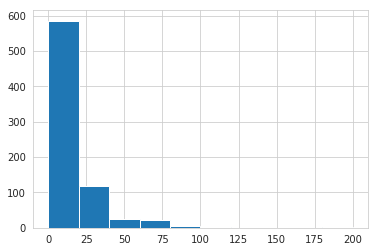

In [0]:
df_clean_full["S_80_QUANTO_PODERIA_AUMENTAR_SUA_PRODUÇÃO"].hist()

#### Visual exploration of data

### D_frame sem tratamento de outliers

In [0]:
import numpy as np

df_clean_full[param_num].corr().unstack().sort_values(ascending=False).drop_duplicates().head(10)


S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM  S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM      1.000000
S_36_4_PASTAGEM_PROVISÓRIA_%                 S_36_2_PASTAGEM_CAPIM_GORDURA_%                  0.571156
S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA        S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO               0.557273
S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA             S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO               0.442231
                                             S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA            0.427722
S_72_1_DESTINO_PRODUÇÃO_QUEIJO_LOCAL_%       S_65_INFRAESTRUTURA_E_BENFEITORIAS_EXISTENTES    0.417001
S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA        S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM      0.373483
S_80_QUANTO_PODERIA_AUMENTAR_SUA_PRODUÇÃO    S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR           0.358091
S_132_4_PESSOAS_FAMILIA_ACIMA_DE_65_ANOS     S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO               0.353478
S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA        S_89_1_TEMPO_DE_MATURAÇÃO_AT

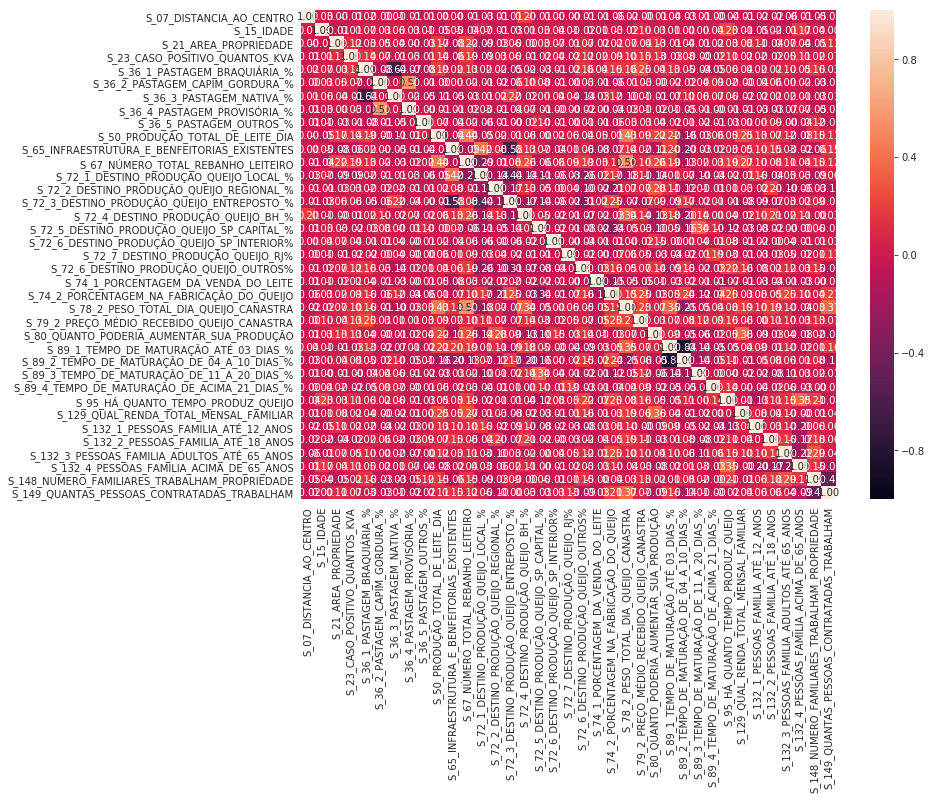

In [0]:
#Nesta matrix de correlação podemos visualizar diversas correlações positivas e negativas entre as variáveis
#Para price, a única variável com correlação negativa é tempo de existência do imóvel. Ou seja, quanto maior o tempo de existência menor é o seu preço. 

plt.figure(figsize=(12, 9))  # Aumenta o tamanho da figura
ax=sns.heatmap(df_clean_full[param_num].corr(),
    vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

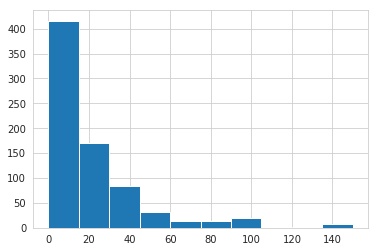

In [0]:
#70 kilos 

df_clean_full["S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA"].hist()

In [0]:
df_clean_full[['S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO',
       'S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA',"S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA","S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA"]].corr()



,S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO,S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA,S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA,S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA
S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO,1.000000,0.151413,0.007806,0.151413
S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA,0.151413,1.000000,0.427722,1.000000
S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA,0.007806,0.427722,1.000000,0.427722
S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA,0.151413,1.000000,0.427722,1.000000


In [0]:
# Esta visualização com Scatter plot e regressão linear bivariada,
#conta com uma matrix sem tratamento de outliers para variáveis Categoricas, 
#Na última linha, nota-se water_front e renovated possuem indicação de correlação positiva com price
#Condição do imóvel e Zip apresentou correlação nula

plt.figure(figsize=(9, 6))
g = sns.pairplot(
    pd.concat([df_clean_full[param_cat],df_clean_full["price"]],axis=1).sample(n=3000),
    size = 2.5,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}
)


In [0]:
# Esta visualização com Scatter plot e regressão linear bivariada,
#conta com uma matrix sem tratamento de outliers para variáveis Numéricas, ao contrário da anterior
#Na primeira coluna, nota-se que quase todas as variáveis apresentam indicação positiva ou negativa correlacional,
#exceto size_lot e avg_size_neighbors. Isso significa que elas podem causar algum impacto na variável de interesse "Price"


plt.figure(figsize=(9, 6))
g = sns.pairplot(
    df[param_num].sample(n=3000),
    size = 2.5,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.03}}
)

### D_frame Com tratamento de outliers

In [0]:
#Nesta parte, ao contrário da anterior, será realizado uma varredura de outlier, 
#seu tratamento e análise visual bivariado conforme seção anterior

#Neste Boxplot univariado, pode-se notar diversos outliers

plt.title("Boxplot com outliers")
for position,feature in enumerate(param_num):  
  plt.figure(figsize=(3, 3))
  plt.figure(position)  
  plt.title(feature)
  sns.boxplot(data=df,y=feature)
  plt.plot()

In [0]:
#A remoção de outliers empregará um intervalo de confiança de 99%

import numpy as np
from scipy import stats

df_99 = df[df[param_num].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [0]:
#Ao realizar o boxplot nesta base tratada, pode-se observar redução significativa de outliers - ainda que preço aponte inúmeras outras
#Não se aconselha remover todos os outliers pois a modelagem poderá sofrer com a entrada de outros imóveis que podem possuir este preço
#Futuramente, pode-se realizar um estudo apenas com os candidatos a outlier fora do intervalo de confiança de 95%.

for position,feature in enumerate(param_num):  
  plt.figure(figsize=(3, 3))
  plt.figure(position)  
  plt.title(feature)
  sns.boxplot(data=df_99,y=feature)
  plt.plot()

In [0]:
#Mesmo empregando intervalos diferentes, nota-se que que as correlações positivas e negativas 
#mais fortes permanecem após o tratamento de outliers

plt.figure(figsize=(12, 9))

plt.subplot(3,1,1)

ax=sns.heatmap(
    df[param_num].corr(),
    vmin=-1, vmax=1, annot=True, fmt='.2f')

plt.title("Original matrix")

#################################

plt.subplot(3,1,3)
ax=sns.heatmap(
    df_99[param_num].corr(),
    vmin=-1, vmax=1, annot=True, fmt='.2f')
ax=plt.title("99% matrix")

plt.show()

In [0]:
# Esta visualização com Scatter plot e regressão linear bivariada,
#conta com uma matrix com tratamento de outliers para variáveis Categoricas, 
#Na última linha, nota-se water_front e renovated possuem indicação de correlação positiva com price
#Condição do imóvel apresentou um leve aumento correlacional e Zip apresentou correlação levemente negativa

plt.figure(figsize=(9, 6))

g = sns.pairplot(
    pd.concat([df_99[param_cat],df_99["price"]],axis=1).sample(n=3000),
    size = 2.5,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}
)


In [0]:
# Esta visualização com Scatter plot e regressão linear bivariada,
#conta com uma matrix com tratamento de outliers para variáveis Numéricas, ao contrário da anterior
#Na primeira coluna, nota-se que quase todas as variáveis apresentam indicação positiva ou negativa correlacional para "Price"

plt.figure(figsize=(9, 6))
g = sns.pairplot(
    df_99[param_num].sample(n=3000),
    size = 2.5,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.03}}
)

## Análise bivariada robustas discretizada de preço usando quartis 

O próposito desta análise é comparar 4 diferentes faixas de preço usando os perncetils tradicionais(0.25,0.5 e 0.75) com as outras variáveis. 

Parte-se como hipótese de que estas quatro categorias possuem comportamentos diferentes quanta as outras variáveis

Algumas perguntas emergem: 

* Com os atributos apresentados, consigo diferenciar entre essas 4 faixas de preço? 
* Se sim, no que elas diferenciam entre si? 
* essas diferenças são significativas? 

In [0]:
#Ilustração visual via Histograma de corte para análise - quartis tradicionais

plt.figure(figsize=(10, 6))

df_99["price"].hist()

plt.axvline(x=df_99["price"].quantile(0.25),color="red")

plt.axvline(x=df_99["price"].quantile(0.5),color="red")

plt.axvline(x=df_99["price"].quantile(0.75),color="red")

In [0]:
#Criação das quatro faixas de preço

df_99["price_class"]=df_99["price"].apply(
    lambda x : "A" if x > df_99["price"].quantile(0.75) else 
    ("B" if x < df_99["price"].quantile(0.75) and x> df_99["price"].quantile(0.5) else 
    ("C" if x < df_99["price"].quantile(0.5) and x> df_99["price"].quantile(0.25) else "D")))

In [0]:
#Pode-se observar que as quatro faixas estão bem distribuidas em termos de contagem

df_99["price_class"].value_counts()

In [0]:
#Na visualização abaixo, pode-se notar que todas as regressões apresentam inclinações diferentes, 
#exceto nas variáveis size_lot e avg_lot_size. Isto apresenta indícios de que 
#estas faixas de preço apresentam comportamentos diferentes entre elas

plt.figure(figsize=(5,3))
for feature in param_num[1:]:
  
  sns.lmplot(data=df_99,x="price",y=feature,hue="price_class",fit_reg=True, markers=["o", "x","v","."])
  
  

In [0]:
#Teste estatístico de frequência usando a tabela de contigência via Chi-square para as variáveis categporicas investigadas 
#todas elas apresentaram p-value menor que 0.01 com nível de significância 99%.
#Isso quer dizer a hipótese nula de distribuição esperada é rejeitada, portanto elas possuem indicação de impacto dentro das faixas criadas

from scipy.stats import chi2_contingency

for feature in param_cat:  

  pd_chi=pd.crosstab(df_99.price_class,df_99[feature])
  g, p, dof, expctd = chi2_contingency(pd_chi)
  
  print("The Chisquare-test between Hit and Flop using frequency table of {} is {:03.3f} and p-value of {:03.3f}".format(feature,g,p))

In [0]:
#Teste estatístico de ANOVA para as variáveis numéricas investigadas 
#todas elas apresentaram p-value menor que 0.01 com nível de significância 99%.
#Isso quer dizer a hipótese nula de distribuição esperada é rejeitada, portanto elas possuem indicação de impacto dentro das faixas criadas

import scipy.stats as stats


for feature in param_num[1:]:

  rvsA=df_99.loc[(df_99["price_class"]=="A"),feature]
  
  rvsB=df_99.loc[(df_99["price_class"]=="B"),feature]
  
  rvsC=df_99.loc[(df_99["price_class"]=="C"),feature]
  
  rvsD=df_99.loc[(df_99["price_class"]=="D"),feature]

  t,p=stats.f_oneway(rvsA,rvsB,rvsC,rvsD)
  
  print("The Anova-test between different PRICE CLASS using mean value of {} is {:03.3f} and p-value of {:03.3f}".format(feature,t,p))

# Modelagem

## Preparação de dados

In [0]:
#Efetuou-se teste de normalidade para todas as variáveis numéricas sem realizar nenhuma transformação 
#Segundo o teste de Shapiro, todas elas rejeitaram a condição de normalidade 
#Ou seja, nenhuma apresenta característica de normalidade

for position,feature in enumerate(["price","size_house","size_lot","recent_year","existence_year","avg_size_neighbor_houses","avg_size_neighbor_lot"]):  
  
  plt.figure(position)
  
  #stats.probplot(np.log(df_99[feature]), plot=plt)
  plt.title(feature)
  stats.probplot(df_99[feature], plot=plt,fit=True,rvalue=True)  
  t,p=stats.shapiro(df_99[feature])
  print("The Shapiro-test of normality for {} is {:03.3f} and p-value of {:03.3f}".format(feature,t,p))
  plt.plot() 

In [0]:
#Aqui, efetuou-se também o teste de normalidade para todas as variáveis numéricas após realização transformação Log 
#(também se tentou com Box-cox transformation - mas resultados similares)
#Segundo o teste de Shapiro, todas elas rejeitaram a condição de normalidade 
#Ou seja, nenhuma apresenta característica de normalidade ainda que transformada
#No entanto, a distribuição apresentou melhoria visual significativa 


for position,feature in enumerate(["price","size_house","size_lot","recent_year","existence_year","avg_size_neighbor_houses","avg_size_neighbor_lot"]):  
  
  plt.figure(position)
  plt.title(feature)
  stats.probplot(np.log1p(df_99[feature]), plot=plt,fit=True,rvalue=True)
  t,p=stats.shapiro(np.log1p(df_99[feature]))
  print("The Shapiro-test of normality for {} is {:03.3f} and p-value of {:03.3f} after log transformation".format(feature,t,p))  
  plt.plot()

In [0]:
#Transformação log-log das variáveis numéricas

for position,feature in enumerate(["price","size_house","size_lot","recent_year","existence_year","avg_size_neighbor_houses","avg_size_neighbor_lot"]):  
  
  df_99[feature] = np.log1p(df_99[feature])

In [0]:
#Dada quantidade de variáveis com alto poder correlacional entre elas, corre-se o risco de heterodestacidade e data leak
#Com isso em mente, realizou a deletação de algumas variáveis que podem ser substituídas por outras, bem como variáveis que não
#serão utilizadas, tais como lat,long e price_class

var_drop=["recent_year","avg_size_neighbor_lot","avg_size_neighbor_houses","latitude","longitude","price_class"]

df_99_model=df_99.drop(columns=var_drop).copy()

## Pipeline

In [0]:
#Nesta célula apresento o pipeline de dados empregado tendo em mente 3 pontos:
#Primeiro, padronização dos valores numéricos e dumificação das variáveis categóricas
#Segundo, apresentação dos modelos de predição - sendo do mais básico via Statsmodel,
#seguido por Lasso,Ridge,Elastic e Xgb
#Por fim, apresentação dos scores de predição, análises de resíduo e as variáveis mais importantes
#do modelo

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV





# Prep para variaveis numericas

var_model_regress=["num_bed",
"num_bath",
"size_house",
"size_lot",
"num_floors",
"size_basement",
"existence_year"]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])







# Prep para variaveis categoricas

var_model_cat=["is_waterfront","condition","zip","renovated?"]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

var_model_cat=["is_waterfront","condition","zip","renovated?"]





#Processador via coluna

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, var_model_regress),
        ('cat', categorical_transformer, var_model_cat)])






#Processador para cada algoritmo

xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('XGB', XGBRegressor(n_estimators=1000,learning_rate=0.05))])


ridge = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Ridge', Ridge())])

lasso = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Lasso', LassoCV(alphas = [1, 0.1, 0.001, 0.0005]))])

# parametersGrid = {"max_iter": [1, 5, 10],
#                     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#                     "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = pd.concat([df_99_model[var_model_regress],df_99[var_model_cat]],axis=1)
y = df_99_model["price"]

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.20,random_state=1)

## Análise dos resultados

In [0]:
#Utilizando Statsmodel conjugando em GLM robust (modelo GLM de regressão que utilza quartis ao invés da média em seu modelo) apresentou
#no set de treino que todas as variáveis exceto size_basement, como variáveis com significância estatística suficiente para a Price

import statsmodels.api as sm
import statsmodels.formula.api as smf


df_99_model_robust = sm.RLM(train_y, train_X, M=sm.robust.norms.HuberT())
df_99_model_robust_results = df_99_model_robust.fit()
print(df_99_model_robust_results.summary())

In [0]:
#Apresenta-se os modelos utilizados e suas respectivas performance utilizando os datasets de test em cima do modelo

from sklearn.model_selection import train_test_split, GridSearchCV

X = pd.concat([df_99_model[var_model_regress],df_99[var_model_cat]],axis=1)
y = df_99_model["price"]

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.20,random_state=1)

ridge.fit(train_X, train_y)
print("Ridge model score: %.3f" % ridge.score(test_X, test_y))

lasso.fit(train_X, train_y)
print("Lasso model score: %.3f" % lasso.score(test_X, test_y))

xgb.fit(train_X, train_y)
print("XGB model score: %.3f" % xgb.score(test_X, test_y))

In [0]:
#Para fins de verificação das variáveis e seu impacto, no modelo Lasso realizou a 
#decupagem das coeficientes gerados para análise fora do pipe
#Pode-se observar que as variáveis size_house,is_waterfront e renovated?(sim ou não) são os três principais contribuintes positivos para Price
#Já Size_lot e num_bed contribuiram negativamente, ainda que valor no limite de zero.

#Resumidamente, o modelo estatístico seria:

#price = (0.855149 * size_house)+(0.336951 * is_waterfront )+
#(0.217367 * renovated?)+(0.087856 * num_floors)+
#(0.074515 * existence_year)+(0.069184 * num_bath)+(0.053192 * condition)+
#(0.000599 * zip)+(0.000005 * size_basement )+(0.071822 * size_lot)+(0.079467 * num_bed)


lasso_model =LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(train_X, train_y)

coef = pd.Series(lasso_model.coef_, index = train_X.columns)

print("No modelo Lasso pegou " + str(sum(coef != 0)) + " variáveis e eliminou " +  str(sum(coef == 0)) + " variáveis")

coef_limp = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(5)])

coef_limp.plot(kind = "barh")
plt.title("Valor dos coeficientes no modelo Lasso")

In [0]:
#Na análise de resíduo, diferença entre o valor predito e o valor y teste, nota-se que ela está distribuida aleatoriamente
#Indicando distribuição normal dos resultados e assim, pode-se dizer que o modelo possui poder explicativo satisfatório
#No entanto, o teste de Shapiro rejeita a hipótese de normalidade dos resíduos. 
#Dessa forma, ainda que o modelo apresente pontuação razoavelmente alto de 84~85, ainda há pontos para serem melhorados afim de melhorar a 
#distribuicao residual)


plt.rcParams['figure.figsize'] = (6.0, 6.0)

predicao = pd.DataFrame({"predicao":lasso_model.predict(train_X), "true":train_y})
predicao["residuo"] = predicao["true"] - predicao["predicao"]
predicao.plot(x = "predicao", y = "residuo",kind = "scatter")

t_p=stats.shapiro(predicao["residuo"])

print("The Shapiro-test of normality for residuals is {:03.3f} and p-value of {:03.3f}".format(t,p))

# Pontos de discussão e melhoria do estudo

Alguns pontos importantes que chamaram atenção neste estudo quanto aos dados e pontos de melhoria que podem ser realizados futuramente:

* Dada as limitações de tempo, não foi realizado otimização dos parâmetros
* A variável condição do imóvel não apresentou grande impacto no preço. No bom senso ela deveria ter um impacto razoavelmente maior no estudo - deve-se atentar em como foi realizado a coleta desse dado
* Não foi empregado Lat e Long neste estudo, uma possível aproximação seria transformação das 4 ou 5 primeiros números e transformá-los em categorias. O mesmo poderia ser feito para zip, e assim diminuir o número de níveis. No estudo havia 70 diferentes zips, considerando apenas as 4 primeiras letras poderia diminuir para 16 níveis.
* Por fim, diferentes níveis de intervalo de confiança para tratamento de outliers podem ser empregados afim de mensurar sua resposta quanto ao Score dos modelos de predição